**Вардумян А.Т. ИУ5-61Б**

<a id='0'></a>
# Оглавление

2. [Задание](#1)<br>
3. [Описание датасета](#2)<br>
4. [Импорт библиотек](#3)<br>
5. [Загрузка и первичный анализ данных](#4)<br>
6. [Визуализация](#5)<br>
7. [Корреляционный анализ](#6)<br>
8. [Построение моделей](#7)<br>
9. [Выводы](#8)<br>

<a id="1"></a>
# Задание ([к оглавлению](#0))

Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

<a id="2"></a>
# Описание датасета ([к оглавлению](#0))

Датасет `Graduate Admission 2` создан для прогнозирования поступления в аспирантуру. Он состоит из двух таблиц:
- `Admission_Predict.csv`
- `Admission_Predict_Ver1.1.csv`

В текущей работе используем второй.

Таблица `Admission_Predict_Ver1.1.csv` состоит из следующих столбцов:
- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance ( ranging from 0 to 1 )

<a id="3"></a>
# Импорт библиотек ([к оглавлению](#0))

In [14]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id="4"></a>
# Загрузка и первичный анализ данных ([к оглавлению](#0))

In [2]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv", sep=",")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# Удалим ненужный столбец
df = df.drop("Serial No.", axis=1)
# Переименуем столбцы, чтобы избавиться от пробелов в именах
df = df.rename(columns={
    "GRE Score": "GRE",
    "TOEFL Score": "TOEFL",
    "University Rating": "Rating",
    "CGPA": "GPA",
})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GRE       500 non-null    int64  
 1   TOEFL     500 non-null    int64  
 2   Rating    500 non-null    int64  
 3   SOP       500 non-null    float64
 4   LOR       500 non-null    float64
 5   GPA       500 non-null    float64
 6   Research  500 non-null    int64  
 7   Chance    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [5]:
df.describe()

,GRE,TOEFL,Rating,SOP,LOR,GPA,Research,Chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<a id="5"></a>
# Визуализация ([к оглавлению](#0))

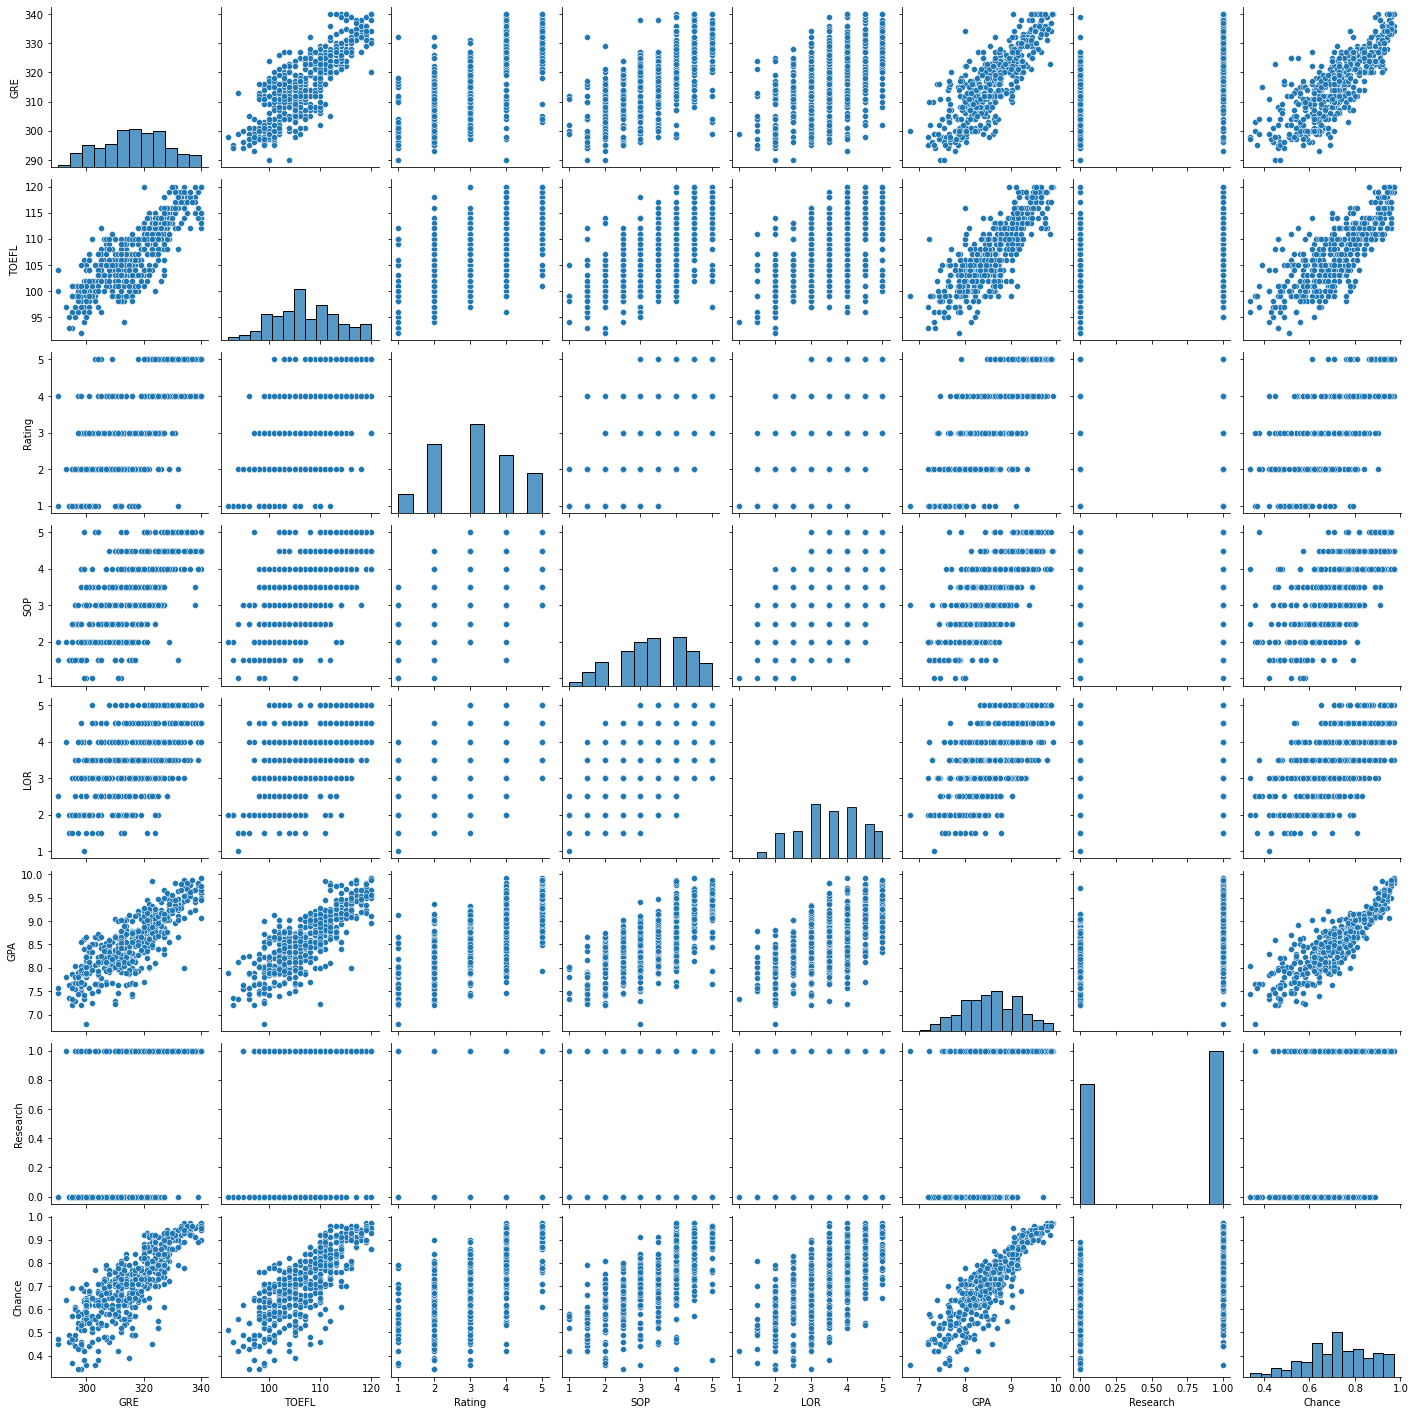

In [6]:
sns.pairplot(df)

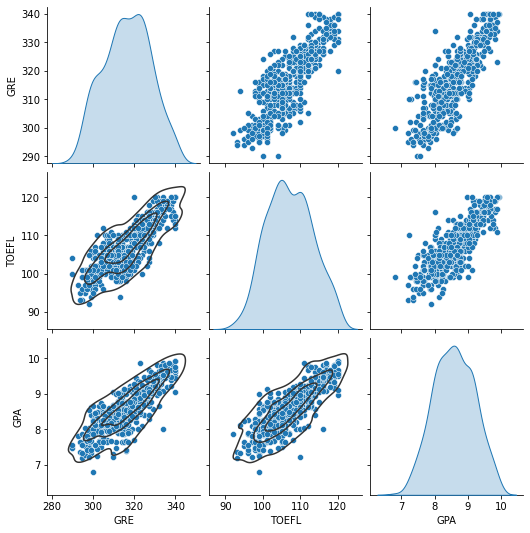

In [7]:
g = sns.pairplot(
    df,
    vars=['GRE', 'TOEFL', 'GPA'],
    diag_kind='kde'
)
g.map_lower(sns.kdeplot, levels=4, color=".2")

<AxesSubplot:xlabel='GPA', ylabel='GRE'>

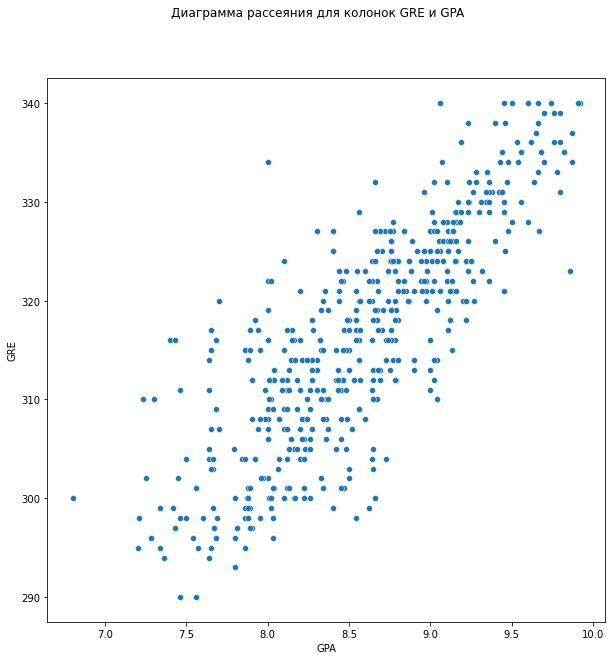

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle("Диаграмма рассеяния для колонок GRE и GPA")
sns.scatterplot(ax=ax, x='GPA', y='GRE', data=df)

<a id="6"></a>
# Корреляционный анализ ([к оглавлению](#0))

In [9]:
df.corr()

,GRE,TOEFL,Rating,SOP,LOR,GPA,Research,Chance
GRE,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
GPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [10]:
df.corr()['Chance']

GRE         0.810351
TOEFL       0.792228
Rating      0.690132
SOP         0.684137
LOR         0.645365
GPA         0.882413
Research    0.545871
Chance      1.000000
Name: Chance, dtype: float64

<AxesSubplot:>

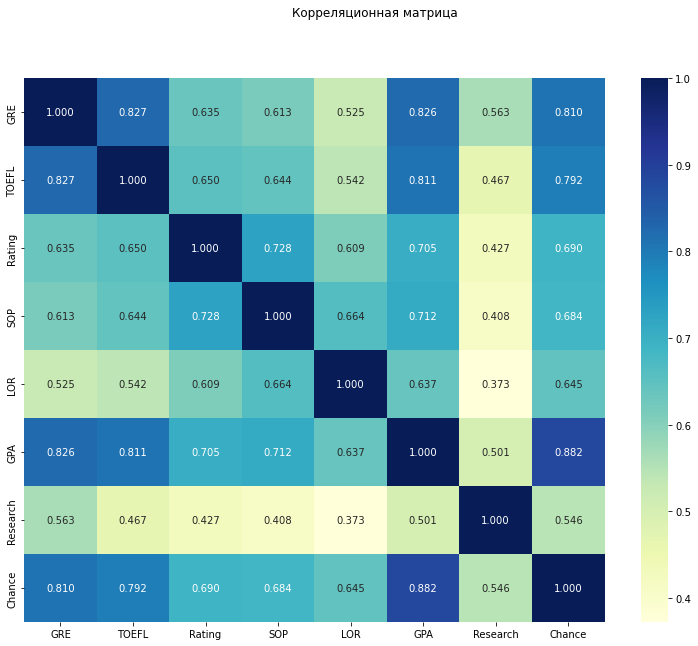

In [11]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(13,10))
fig.suptitle('Корреляционная матрица')
sns.heatmap(df.corr(), ax=ax, annot=True, fmt='.3f', cmap='YlGnBu')

На основе корреляционной матрицы можно сделать следующие выводы.

Все признаки достаточно хорошо коррелируют с целевым признаокм `Chance`:

|Признак|Корреляция|
| :- | :-: |
|GRE|0.810351|
|TOEFL|0.79222|
|Rating|0.690132|
|SOP|0.684137|
|LOR|0.645365|
|GPA|0.882413|
|Research|0.545871|

Признаки `GRE`, `TOEFL`, `GPA` сильно коррелируют между собой, следовательно, для того, чтобы повысить качество модели, стоит выбрать из них только один, который наиболее сильно коррелирует с целевым признаком, т.е. `GPA`.

Таким образом, для построения модели использовались бы следующие признаки: `Rating`, `SOP`, `LOR`, `GPA`, `Research`.  

In [12]:
df = df.drop(["GRE", "TOEFL"], axis=1)

<a id="7"></a>
# Построение моделей ([к оглавлению](#0))

In [15]:
X = df.loc[:, df.columns != 'Chance']
y = df["Chance"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Линейная регрессия

In [30]:
lnr_rg = Pipeline([('scaler', StandardScaler()), ('regressor', LinearRegression())])
lnr_rg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [54]:
lnr_rg_predict = lnr_rg.predict(X_test)

mean_squared_error(y_test, lnr_rg_predict), \
median_absolute_error(y_test, lnr_rg_predict), \
r2_score(y_test, lnr_rg_predict)

(0.003562026910742569, 0.030320104976299556, 0.8155441504457268)

## Случайный лес

In [46]:
rand_fr = RandomForestRegressor()
rand_fr.fit(X_train, y_train)

RandomForestRegressor()

In [55]:
rand_fr_predict = rand_fr.predict(X_test)

mean_squared_error(y_test, rand_fr_predict), \
median_absolute_error(y_test, rand_fr_predict), \
r2_score(y_test, rand_fr_predict)

(0.004308684550000009, 0.028899999999999704, 0.7768792631142867)

<a id="8"></a>
# Выводы ([к оглавлению](#0))

Сравнительная таблица двух моделей:

|Метрика|LinearRegression|RandomForestRegressor|
| :- | :-: | :-: |
|MSE|0.0036|0.0043|
|MAE|0.0303|0.0289|
|R2 score|0.82|0.78|

---

Обе модели обладают хорошим качество, т.к. у них большой коэффициент детерминизации и маленькие MSE и MAE. Остановимся на модели линейной регрессии (у нее больше коэффициент детерминизации и меньше MSE).

---